In [1]:
# referencing Module 17 - 1 - Ins_Multiple_Linear_Regression_Sklearn
# referencing Module 17 - linear regression
# referencing Module 19  - AlphabetSoupCharity.ipynb


import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import tensorflow as tf

%matplotlib inline
# import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns


# Pull Cleaned Data from Python and Excel
- changed column names so no spaces - in Excel
- deleted 12 rows of null value data - in Python
- changed datatype of columns (from object to int or float64) - in Python
- changed Streams to a 'Number' - which took the comma out of it - in Python
- changed Genre column to only contain 1 Genre vs. an array of Genres - in Python
- There are 1,470 Rows of Data

In [2]:
# Read the data in a .csv file
df = pd.read_csv(Path('clean_data2.csv'))
df

,Highest_Charting_Position,Number_of_Times_Charted,Song_Name,Streams,Artist,Artist_Followers,Song_ID,Genre,Release_Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence,Chord
0,1,8,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,rock,12/8/2017,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589,B
1,2,3,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,hip hop,7/9/2021,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478,C#/Db
2,1,11,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,5/21/2021,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688,A
3,3,5,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,6/25/2021,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591,B
4,5,1,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,hip hop,7/23/2021,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,195,1,New Rules,4630675,Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,pop,6/2/2017,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608,A
1466,196,1,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,latin,10/11/2019,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714,B
1467,197,1,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,pop,1/12/2018,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394,D
1468,198,1,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,soul,9/25/2019,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881,F


In [3]:
# Determine data types and verify needed columns are changed to int64 or float64

df.dtypes

Highest_Charting_Position      int64
Number_of_Times_Charted        int64
Song_Name                     object
Streams                        int64
Artist                        object
Artist_Followers               int64
Song_ID                       object
Genre                         object
Release_Date                  object
Popularity                     int64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration_(ms)                  int64
Valence                      float64
Chord                         object
dtype: object

In [4]:
# Determine datatype and if any null values remaining

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest_Charting_Position  1470 non-null   int64  
 1   Number_of_Times_Charted    1470 non-null   int64  
 2   Song_Name                  1470 non-null   object 
 3   Streams                    1470 non-null   int64  
 4   Artist                     1470 non-null   object 
 5   Artist_Followers           1470 non-null   int64  
 6   Song_ID                    1470 non-null   object 
 7   Genre                      1470 non-null   object 
 8   Release_Date               1470 non-null   object 
 9   Popularity                 1470 non-null   int64  
 10  Danceability               1470 non-null   float64
 11  Energy                     1470 non-null   float64
 12  Loudness                   1470 non-null   float64
 13  Speechiness                1470 non-null   float

# Check for Linear relationships

### Original Analysis determined that we would be using Multiple Linear Regression analysis
- we first need to determine if there are any Linear realationships in the data
- after review, there is very little direct linear regression in this dataset
- we will need to review other models below

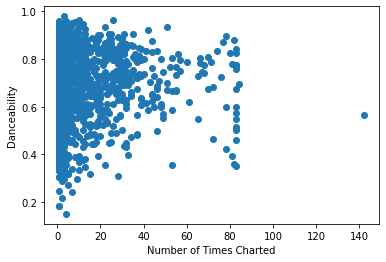

In [5]:
# Check for linear relationship between Number of Times Charted AND Danceability

plt.scatter(df.Number_of_Times_Charted, df.Danceability)
plt.xlabel('Number of Times Charted')
plt.ylabel('Danceability')
plt.show()

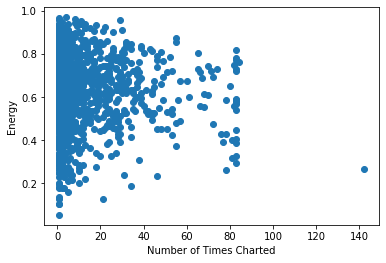

In [6]:
# Check for linear relationship between Number of Times Charted AND Energy

plt.scatter(df.Number_of_Times_Charted, df.Energy)
plt.xlabel('Number of Times Charted')
plt.ylabel('Energy')
plt.show()

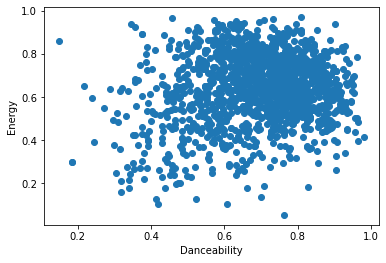

In [7]:
# Check for linear relationship between Danceability AND Energy

plt.scatter(df.Danceability, df.Energy)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

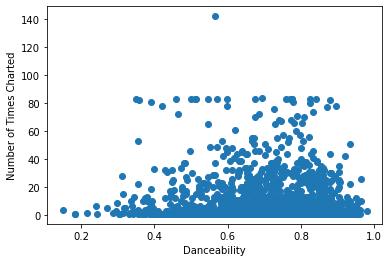

In [8]:
# Check for linear relationship between Danceability AND Number of Times Charted

plt.scatter(df.Danceability, df.Number_of_Times_Charted)
plt.xlabel('Danceability')
plt.ylabel('Number of Times Charted')
plt.show()

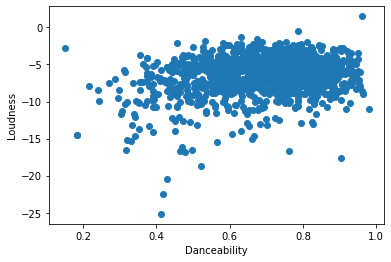

In [9]:
# Check for linear relationship between Danceability AND Loudness

plt.scatter(df.Danceability, df.Loudness)
plt.xlabel('Danceability')
plt.ylabel('Loudness')
plt.show()

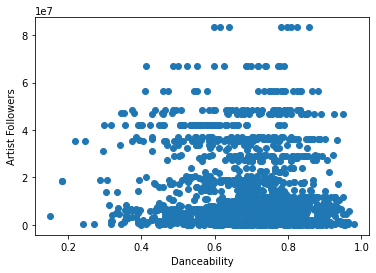

In [10]:
# Check for linear relationship between Danceability AND Artist Followers

plt.scatter(df.Danceability, df.Artist_Followers)
plt.xlabel('Danceability')
plt.ylabel('Artist Followers')
plt.show()

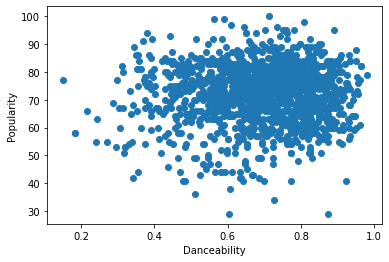

In [11]:
# Check for linear relationship between Danceability AND Popularity

plt.scatter(df.Danceability, df.Popularity)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

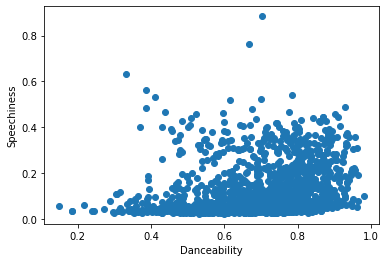

In [12]:
# Check for linear relationship between Danceability AND Speechiness

plt.scatter(df.Danceability, df.Speechiness)
plt.xlabel('Danceability')
plt.ylabel('Speechiness')
plt.show()

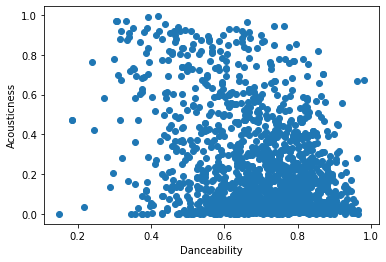

In [13]:
# Check for linear relationship between Danceability AND Acousticness

plt.scatter(df.Danceability, df.Acousticness)
plt.xlabel('Danceability')
plt.ylabel('Acousticness')
plt.show()

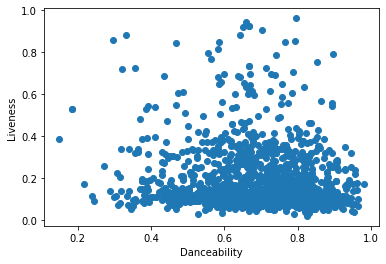

In [14]:
# Check for linear relationship between Danceability AND Liveness

plt.scatter(df.Danceability, df.Liveness)
plt.xlabel('Danceability')
plt.ylabel('Liveness')
plt.show()

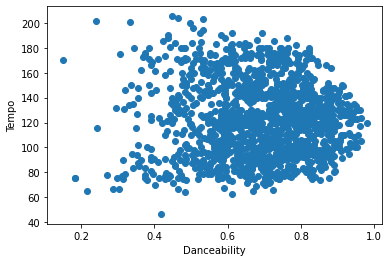

In [15]:
# Check for linear relationship between Danceability AND Tempo

plt.scatter(df.Danceability, df.Tempo)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.show()

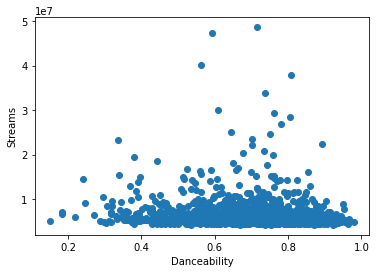

In [16]:
# Check for linear relationship between Danceability AND Streams

plt.scatter(df.Danceability, df.Streams)
plt.xlabel('Danceability')
plt.ylabel('Streams')
plt.show()

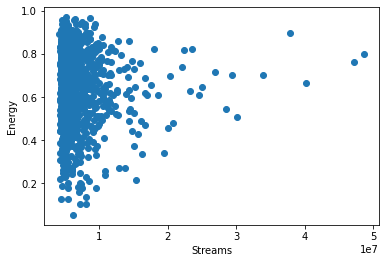

In [17]:
# Check for linear relationship between Streams  AND Energy

plt.scatter(df.Streams, df.Energy)
plt.xlabel('Streams')
plt.ylabel('Energy')
plt.show()

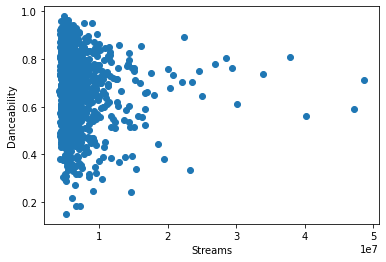

In [18]:
# Check for linear relationship between Streams  AND Danceability

plt.scatter(df.Streams, df.Danceability)
plt.xlabel('Streams')
plt.ylabel('Danceability')
plt.show()

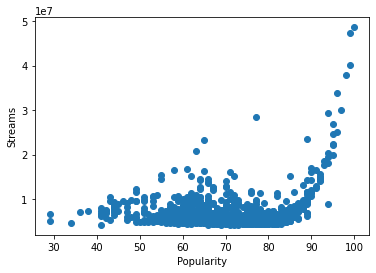

In [19]:
# Check for linear relationship between Popularity AND Streams

plt.scatter(df.Popularity, df.Streams)
plt.xlabel('Popularity')
plt.ylabel('Streams')
plt.show()

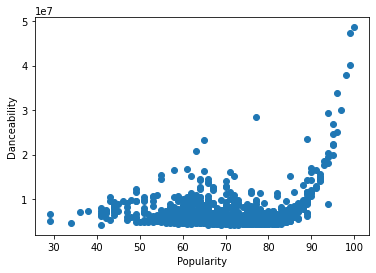

In [20]:
# Check for linear relationship between Popularity AND Danceability

plt.scatter(df.Popularity, df.Streams)
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.show()

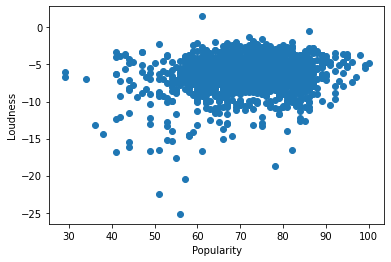

In [21]:
# Check for linear relationship between Popularity AND Loudness

plt.scatter(df.Popularity, df.Loudness)
plt.xlabel('Popularity')
plt.ylabel('Loudness')
plt.show()

# Visualize the Data

### We will be reviewing if we can predict Streaming based on the features of the dataset
- review top Streaming data for Artists, Genre and Song

### Top 10 Streamed Artists

In [22]:
#Sorting by Streams - top 10
sort_streams=df.sort_values('Streams',ascending=False).head(10)
sort_streams

,Highest_Charting_Position,Number_of_Times_Charted,Song_Name,Streams,Artist,Artist_Followers,Song_ID,Genre,Release_Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence,Chord
0,1,8,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,rock,12/8/2017,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589,B
1,2,3,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,hip hop,7/9/2021,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db
2,1,11,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,5/21/2021,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688,A
3,3,5,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,6/25/2021,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B
4,5,1,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,hip hop,7/23/2021,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,1,18,MONTERO (Call Me By Your Name),30071134,Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,hip hop,3/31/2021,97,0.610,0.508,-6.682,0.1520,0.2970,0.3840,178.818,137876,0.758,G#/Ab
6,3,16,Kiss Me More (feat. SZA),29356736,Doja Cat,8640063,748mdHapucXQri7IAO8yFK,pop,4/9/2021,94,0.762,0.701,-3.541,0.0286,0.2350,0.1230,110.968,208867,0.742,G#/Ab
1349,7,1,Intentions,28509534,"Justin Bieber, Quavo",48544923,4umIPjkehX1r7uhmGvXiSV,pop,2/14/2020,77,0.806,0.546,-6.637,0.0575,0.3000,0.1020,147.986,212867,0.874,A
7,2,10,Todo De Ti,26951613,Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,latin,5/20/2021,95,0.780,0.718,-3.605,0.0506,0.3100,0.0932,127.949,199604,0.342,D#/Eb
8,3,8,Yonaguni,25030128,Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,latin,6/4/2021,96,0.644,0.648,-4.601,0.1180,0.2760,0.1350,179.951,206710,0.440,C#/Db


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

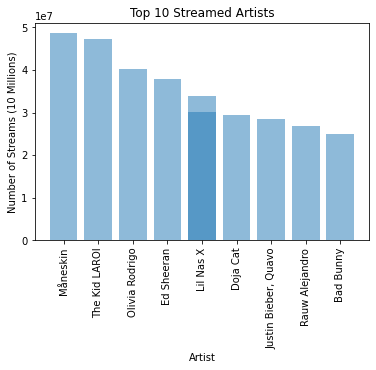

In [23]:
# create a barchart for top 10 Streamed Artists
# NOTE: Lil Nas in spots 5 and 6
x_axis = sort_streams.Artist
y_axis = sort_streams.Streams
plt.bar(x_axis, y_axis, alpha=0.5, align="center")

plt.title("Top 10 Streamed Artists")
plt.xlabel("Artist")
plt.ylabel("Number of Streams (10 Millions)")
plt.xticks(rotation='vertical')

### Top 10 Streamed Genres

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

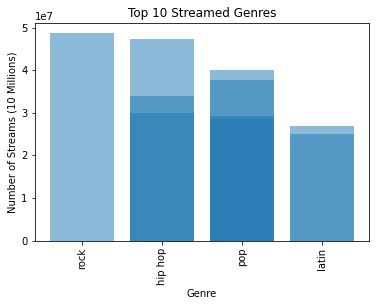

In [24]:
# create a barchart for top 10 Streamed Genres
x_axis = sort_streams.Genre
y_axis = sort_streams.Streams
plt.bar(x_axis, y_axis, alpha=0.5, align="center")

plt.title("Top 10 Streamed Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Streams (10 Millions)")
plt.xticks(rotation='vertical')

# # plot with seaborn example
# plt.figure(figsize=(20,8))
# plt.title("top 10 streamed genres")
# sns.barplot(x='Genre', y='Streams', data=sort_streams.head(10))

### Top 10 Charted Songs

In [25]:
# sort by Highest Charting Position - Top 10
sort_chart=df.sort_values('Highest_Charting_Position',ascending=True).head(10)
sort_chart

,Highest_Charting_Position,Number_of_Times_Charted,Song_Name,Streams,Artist,Artist_Followers,Song_ID,Genre,Release_Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence,Chord
0,1,8,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,rock,12/8/2017,100,0.714,0.800,-4.808,0.0504,0.127,0.3590,134.002,211560,0.589,B
73,1,83,Dance Monkey,7687058,Tones And I,2819593,2XU0oxnq2qxCpomAAuJY8K,pop,10/17/2019,83,0.824,0.588,-6.400,0.0924,0.692,0.1490,98.027,209438,0.513,F#/Gb
84,1,40,positions,7244853,Ariana Grande,67158068,35mvY5S1H3J2QZyna3TFe0,pop,10/30/2020,86,0.737,0.802,-4.771,0.0878,0.468,0.0931,144.015,172325,0.682,C
656,1,12,cardigan,5845457,Taylor Swift,42227614,4R2kfaDFhslZEMJqAFNpdd,pop,7/24/2020,79,0.613,0.581,-8.588,0.0424,0.537,0.2500,130.033,239560,0.551,C
286,1,55,Rain On Me (with Ariana Grande),5041656,Lady Gaga,18572085,24ySl2hOPGCDcxBxFIqWBu,pop,5/22/2020,79,0.672,0.855,-3.764,0.0397,0.021,0.3230,123.056,182200,0.646,A
760,1,27,THE SCOTTS,4941592,"THE SCOTTS, Travis Scott, Kid Cudi",179193,39Yp9wwQiSRIDOvrVg7mbk,hip hop,4/24/2020,79,0.716,0.537,-7.648,0.0514,0.233,0.1570,129.979,165978,0.280,C
258,1,78,The Box,5145099,Roddy Ricch,6603627,0nbXyq5TXYPCO7pr3N8S4I,hip hop,12/6/2019,84,0.896,0.586,-6.687,0.0559,0.104,0.7900,116.971,196653,0.642,A#/Bb
249,1,55,Savage Love (Laxed - Siren Beat),5108950,"Jawsh 685, Jason Derulo",100604,1xQ6trAsedVPCdbtDAmk0c,pop,6/11/2020,82,0.767,0.481,-8.520,0.0803,0.234,0.2690,150.076,171375,0.761,C
45,1,51,Mood (feat. iann dior),10222056,24kGoldn,1274433,4jPy3l0RUwlUI9T5XHBW2m,hip hop,3/26/2021,89,0.701,0.716,-3.671,0.0361,0.174,0.3240,91.007,140533,0.732,G
110,1,67,ROCKSTAR (feat. Roddy Ricch),6180056,DaBaby,7593046,7ytR5pFWmSjzHJIeQkgog4,hip hop,4/17/2020,86,0.746,0.690,-7.956,0.1640,0.247,0.1010,89.977,181733,0.497,B


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

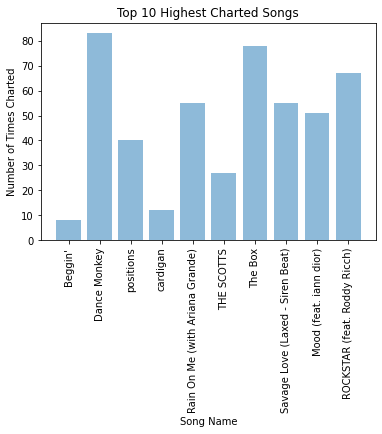

In [26]:
# barchart with top 10 Songs and number of times charted
x_axis = sort_chart.Song_Name
y_axis = sort_chart.Number_of_Times_Charted
plt.bar(x_axis, y_axis, alpha=0.5, align="center")

plt.title("Top 10 Highest Charted Songs")
plt.xlabel("Song Name")
plt.ylabel("Number of Times Charted")
plt.xticks(rotation='vertical')

# Prediction on Streams
- Can we predict the number of Streams based on the features in the dataset
- We will be using several different models to see which one most accurately predicts the number of Streams

## PREPROCESSING

In [27]:
# Clean data some more and drop some unnecessary columns
clean_df = df.drop(['Artist', 'Song_Name', 'Release_Date', 'Song_ID', 'Chord'], axis=1)
clean_df.head()

,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
0,1,8,48633449,3377762,rock,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,2,3,47248719,2230022,hip hop,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,1,11,40162559,6266514,pop,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,3,5,37799456,83293380,pop,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
4,5,1,33948454,5473565,hip hop,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


In [28]:
# Encoding Genre using LabelEncoder (which replaces values with numbers in Genre column)
# Originally using OneHotEncoder, splitting Genre into different columns - THIS DID NOT WORK
genre_encoder = LabelEncoder()
clean_df['Genre'] = genre_encoder.fit_transform(clean_df['Genre'])
clean_df.head()

,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
0,1,8,48633449,3377762,7,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,2,3,47248719,2230022,2,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,1,11,40162559,6266514,6,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,3,5,37799456,83293380,6,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
4,5,1,33948454,5473565,2,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


In [29]:
# Split data into Training and Testing Sets
training_data, testing_data = train_test_split(clean_df, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

testing_data

No. of training examples: 1176
No. of testing examples: 294


,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
942,36,2,5946573,19102888,2,70,0.707,0.670,-6.328,0.2570,0.08130,0.0980,163.099,200629,0.235
415,2,48,5094660,67208170,6,84,0.597,0.450,-6.658,0.0418,0.22300,0.3820,178.765,228482,0.537
1259,46,2,7240117,878491,2,65,0.486,0.388,-9.326,0.1260,0.43500,0.1960,90.471,457592,0.467
466,166,1,5393459,19102888,2,72,0.530,0.370,-9.989,0.0279,0.80600,0.1120,140.061,206734,0.701
424,45,18,4967348,10580764,6,78,0.862,0.720,-4.048,0.0379,0.48700,0.0604,129.972,198707,0.965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,26,35,4745752,3828418,2,80,0.904,0.723,-5.224,0.2600,0.06310,0.1850,145.013,227478,0.835
443,138,2,5418816,13697048,6,73,0.334,0.276,-13.125,0.0643,0.87700,0.1130,201.025,271177,0.429
260,39,45,5048079,3864419,2,83,0.731,0.675,-5.134,0.0434,0.00473,0.1410,124.939,139461,0.298
138,142,23,5607285,20270895,6,84,0.532,0.783,-5.697,0.0523,0.00380,0.1610,124.080,247427,0.643


In [30]:
# Dropping Stream Column From Test data
y_test=testing_data['Streams']
x_test=testing_data.drop('Streams', axis=1)
x_test.head()

,Highest_Charting_Position,Number_of_Times_Charted,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
942,36,2,19102888,2,70,0.707,0.670,-6.328,0.2570,0.0813,0.0980,163.099,200629,0.235
415,2,48,67208170,6,84,0.597,0.450,-6.658,0.0418,0.2230,0.3820,178.765,228482,0.537
1259,46,2,878491,2,65,0.486,0.388,-9.326,0.1260,0.4350,0.1960,90.471,457592,0.467
466,166,1,19102888,2,72,0.530,0.370,-9.989,0.0279,0.8060,0.1120,140.061,206734,0.701
424,45,18,10580764,6,78,0.862,0.720,-4.048,0.0379,0.4870,0.0604,129.972,198707,0.965


In [31]:
# Dropping Stream column from Training Data
y_train=training_data['Streams']
x_train=training_data.drop('Streams',axis=1)
x_train.head()

,Highest_Charting_Position,Number_of_Times_Charted,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
1115,49,2,56327031,2,63,0.543,0.766,-3.387,0.3430,0.4230,0.155,106.869,204805,0.729
1260,122,1,11821805,2,57,0.803,0.719,-4.485,0.3920,0.3440,0.425,129.945,238425,0.549
667,43,2,36177712,5,70,0.643,0.727,-5.506,0.0389,0.0439,0.123,90.019,162299,0.295
1286,91,10,3600989,5,67,0.795,0.715,-3.582,0.0838,0.1410,0.179,165.941,304733,0.758
818,143,7,17931101,2,75,0.716,0.531,-7.355,0.1220,0.0703,0.224,71.994,386907,0.344


In [32]:
# Shapes of training and test data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1176, 14), (1176,), (294, 14), (294,))

## LINEAR REGRESSION MODEL

In [33]:
# LINEAR REGRESSION MODEL

#Linear Regression Modeling and Training
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
print(linear_model.score(x_train,y_train))

#testing the model and Displaying the output
linear_predict=linear_model.predict(x_test)
l_output=pd.DataFrame({'Id':x_test.index,'Predicted Streams':linear_predict,'Actual Stream':y_test})
print(l_output)


0.17790026136941883
        Id  Predicted Streams  Actual Stream
942    942       7.349093e+06        5946573
415    415       7.996391e+06        5094660
1259  1259       7.742785e+06        7240117
466    466       6.539452e+06        5393459
424    424       7.641671e+06        4967348
...    ...                ...            ...
817    817       6.684295e+06        4745752
443    443       7.791414e+06        5418816
260    260       5.465172e+06        5048079
138    138       5.945084e+06        5607285
716    716       3.758484e+06        5151014

[294 rows x 3 columns]


#### LINEAR REGRESSION RESULTS:
- Accuracy:  18%

## RANDOM FOREST REGRESSION MODEL

In [34]:
# RANDOM FOREST REGRESSION

#Random Forest Regression
r_model=RandomForestRegressor(n_estimators=50)
r_model.fit(x_train,y_train)
print(r_model.score(x_test,y_test))

#Making predictions on test set 
r_predict=r_model.predict(x_test)

r_output=pd.DataFrame({'Id':x_test.index,'Predicted Streams':r_predict,'Actual Stream':y_test})
print(r_output)


0.7402653212776111
        Id  Predicted Streams  Actual Stream
942    942         5775836.30        5946573
415    415         5701281.80        5094660
1259  1259         5423850.74        7240117
466    466         5535901.16        5393459
424    424         5414696.94        4967348
...    ...                ...            ...
817    817         5836760.90        4745752
443    443         6059245.18        5418816
260    260         5033961.12        5048079
138    138         5068848.06        5607285
716    716         5140205.14        5151014

[294 rows x 3 columns]


In [53]:
from pprint import pprint
pprint(r_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### RANDOM FOREST REGRESSION RESULTS:
- $R^2$:  .74

## RANDOM FOREST CLASSIFIER MODEL

In [35]:
# RANDOM FOREST CLASSIFIER

#Random Forest Classifier
r_model=RandomForestClassifier(n_estimators=50)
r_model.fit(x_train,y_train)
print(r_model.score(x_test,y_test))

#Making predictions on test set 
r_predict=r_model.predict(x_test)

r_output=pd.DataFrame({'Id':x_test.index,'Predicted Streams':r_predict,'Actual Stream':y_test})
print(r_output)

0.0
        Id  Predicted Streams  Actual Stream
942    942            8293983        5946573
415    415            4986037        5094660
1259  1259            4988571        7240117
466    466            6936305        5393459
424    424            5082563        4967348
...    ...                ...            ...
817    817            6567755        4745752
443    443            4595450        5418816
260    260            4855690        5048079
138    138            5060903        5607285
716    716            4732292        5151014

[294 rows x 3 columns]


#### RANDOM FOREST CLASSIFIER RESULTS:
- Accuracy:  100%   NOTE:  Not sure if this is accurate!!!!!

## DEEP NEURAL NETWORK MODEL

In [36]:
# Neural Network to predict Streams

NN_model = Sequential()

# The Input Layer :
#NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))
NN_model.add(Dense(128, input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))
NN_model.add(Dense(256, activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, activation='linear'))

# # Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1920      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,785
Trainable params: 166,785
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Add checkpoints for callback

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [38]:
# Compile the model
NN_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#NN_model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# NOTE:  ignore the warning when adding in period=5....it still works... per Stackflow

In [39]:
# Train the model
fit_model = NN_model.fit(x_train, y_train, epochs=500, callbacks=[cp_callback])

Epoch 1/500
37/37 [==============================] - 1s 3ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 2/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 3/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 4/500
37/37 [==============================] - 0s 3ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 5/500
37/37 [==============================] - 0s 3ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/500
37/37 [==============================] - 0s 3ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 7/500
37/37 [==============================] - 0s 3ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 8/500
37/37 [==============================] - 0s 3ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 9/500
37/37 [==============================] - 0s 3ms/st

37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 68/500
37/37 [==============================] - 0s 2ms/step - loss: 88821544.0000 - accuracy: 0.0000e+00
Epoch 69/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 70/500
37/37 [==============================] - 0s 3ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00

Epoch 00070: saving model to checkpoints\weights.70.hdf5
Epoch 71/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 72/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 73/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 74/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 75/500
37/37 [==============================] - 0s 2ms/step -

37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 134/500
37/37 [==============================] - 0s 3ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 135/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00

Epoch 00135: saving model to checkpoints\weights.135.hdf5
Epoch 136/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 137/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 138/500
37/37 [==============================] - 0s 3ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 139/500
37/37 [==============================] - 0s 2ms/step - loss: 88821544.0000 - accuracy: 0.0000e+00
Epoch 140/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00

Epoch 00140: saving model to checkpoints\weights.140.hdf5


37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 200/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00

Epoch 00200: saving model to checkpoints\weights.200.hdf5
Epoch 201/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 202/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 203/500
37/37 [==============================] - 0s 3ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 204/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 205/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00

Epoch 00205: saving model to checkpoints\weights.205.hdf5
Epoch 206/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00


37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00

Epoch 00265: saving model to checkpoints\weights.265.hdf5
Epoch 266/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 267/500
37/37 [==============================] - 0s 3ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 268/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 269/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 270/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00

Epoch 00270: saving model to checkpoints\weights.270.hdf5
Epoch 271/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 272/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00


37/37 [==============================] - 0s 2ms/step - loss: 88821544.0000 - accuracy: 0.0000e+00
Epoch 332/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 333/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 334/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 335/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00

Epoch 00335: saving model to checkpoints\weights.335.hdf5
Epoch 336/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 337/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 338/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 339/500
37/37 [==============================] - 0s 2

Epoch 397/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 398/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 399/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 400/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00

Epoch 00400: saving model to checkpoints\weights.400.hdf5
Epoch 401/500
37/37 [==============================] - 0s 3ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 402/500
37/37 [==============================] - 0s 2ms/step - loss: 88821544.0000 - accuracy: 0.0000e+00
Epoch 403/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 404/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 405/500
37/37 [========================

37/37 [==============================] - 0s 2ms/step - loss: 88821544.0000 - accuracy: 0.0000e+00
Epoch 464/500
37/37 [==============================] - 0s 2ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 465/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00

Epoch 00465: saving model to checkpoints\weights.465.hdf5
Epoch 466/500
37/37 [==============================] - 0s 3ms/step - loss: 88821544.0000 - accuracy: 0.0000e+00
Epoch 467/500
37/37 [==============================] - 0s 2ms/step - loss: 88821520.0000 - accuracy: 0.0000e+00
Epoch 468/500
37/37 [==============================] - 0s 2ms/step - loss: 88821528.0000 - accuracy: 0.0000e+00
Epoch 469/500
37/37 [==============================] - 0s 3ms/step - loss: 88821536.0000 - accuracy: 0.0000e+00
Epoch 470/500
37/37 [==============================] - 0s 2ms/step - loss: 88821544.0000 - accuracy: 0.0000e+00

Epoch 00470: saving model to checkpoints\weights.470.hdf5


In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = NN_model.evaluate(x_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



10/10 - 0s - loss: 86779144.0000 - accuracy: 0.0000e+00
Loss: 86779144.0, Accuracy: 0.0


In [41]:
# Predicting the Streams
DNN_predict=NN_model.predict(x_test)

In [42]:
#Creating dataframe to store ID with prediction
DNN_output=pd.DataFrame({'Id':x_test.index,'Predicted Streams':DNN_predict[:,0],'Actual Stream':y_test})
print(DNN_output)

        Id  Predicted Streams  Actual Stream
942    942     -116988.281250        5946573
415    415     -422378.437500        5094660
1259  1259        1222.567871        7240117
466    466     -116843.945312        5393459
424    424      -62967.468750        4967348
...    ...                ...            ...
817    817      -21359.373047        4745752
443    443      -81325.531250        5418816
260    260      -22446.082031        5048079
138    138     -123300.062500        5607285
716    716      -62008.582031        5151014

[294 rows x 3 columns]


#### DEEP NEURAL NETWORK RESULTS:
- Accuracy:  0%
- Tried changing epoch - did not change results

# FINAL ANALYSIS

- It was determined that any form of Linear Regression (including Multiple Linear Regression) was not going to produce any correct modeling behavior
- The best modeling outcome was using Random Forest Regression, which had a 98% Accuracy in predicitng number of Streams based off of the features
- Not sure if Random Forest Classifier is correct - need further analysis

# IGNORE EVERYTHING BELOW - TRIED USING OneHotEncoder AND WORKED UNTIL I GOT TO THE LINEAR REGRESSION MODEL - IT GAVE ERROR SAYING COULD NOT USE THIS MODEL - IT WAS DETERMINED THAT SPLITTING THE GENRE WAS CAUSING A CLASSIFICATION ISSUE

## Cleaning using OneHotEncoder on the Genre - creates 9 columns

In [43]:
clean_df.dtypes

Highest_Charting_Position      int64
Number_of_Times_Charted        int64
Streams                        int64
Artist_Followers               int64
Genre                          int32
Popularity                     int64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration_(ms)                  int64
Valence                      float64
dtype: object

In [44]:
# Determine the number of unique values in each column.
clean_df.nunique()

Highest_Charting_Position     200
Number_of_Times_Charted        74
Streams                      1470
Artist_Followers              573
Genre                           9
Popularity                     64
Danceability                  520
Energy                        559
Loudness                     1327
Speechiness                   753
Acousticness                  930
Liveness                      586
Tempo                        1390
Duration_(ms)                1412
Valence                       716
dtype: int64

In [45]:
#  ???????????????   NOT SURE IF BINNING IS NECESSARY SO NOT DOING FOR NOW

In [46]:
# Generate our Genre variable list
genre_cat = clean_df.dtypes[clean_df.dtypes == "object"].index.tolist()
genre_cat

[]

In [47]:
# Create a OneHotEncoder for Genre
enc = OneHotEncoder(sparse=False)

#Fit and transform the OneHotEncoder using 
encode_df = pd.DataFrame(enc.fit_transform(clean_df[genre_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(genre_cat)
encode_df.head()



""
0
1
2
3
4


In [48]:
# merge one-hot encoded features adn drop the originals
clean_df = clean_df.merge(encode_df,left_index=True, right_index=True)
clean_df = clean_df.drop(genre_cat,1)
clean_df.head()

,Highest_Charting_Position,Number_of_Times_Charted,Streams,Artist_Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_(ms),Valence
0,1,8,48633449,3377762,7,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,2,3,47248719,2230022,2,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,1,11,40162559,6266514,6,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,3,5,37799456,83293380,6,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
4,5,1,33948454,5473565,2,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


In [49]:
# Split our preprocessed data into our features and target arrays
# the Streams column is the target and Features is everything else
y = clean_df["Streams"].values
X = clean_df.drop(["Streams"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [50]:
# Determine size of training and testing
print(f"No. of X_train examples: {X_train.shape[0]}")
print(f"No. of X_test examples: {X_test.shape[0]}")
print(f"No. of y_train examples: {y_train.shape[0]}")
print(f"No. of y_test examples: {y_test.shape[0]}")

No. of X_train examples: 1102
No. of X_test examples: 368
No. of y_train examples: 1102
No. of y_test examples: 368


In [51]:
# standardize the numerical variables - StandardScaler

# Preprocess numerical data for neural network model

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## LINEAR REGRESSION MODEL

In [52]:
# Define the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)
# print(linear_model.score(X_train,y_train))

# Evaluate the model
y_pred = linear_model.predict(X_test)
print(f" Linear regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

# output = pd.DataFrame({'Id':X_test.index, 'Predicted Streams':y_pred, 'Actual Stream':y})
# print(output)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets